# Investigate Titanic Survivor

<img src='img/nytimes.jpg'>

This is a final project from online class in Udacity, [UD170 Intro to Data Analyst](https://classroom.udacity.com/courses/ud170/) to analyze titanic survivor by using [Titanic dataset](https://www.kaggle.com/c/titanic) on Kaggle Competition. This project focus on doing Exploratory Data Analysis (EDA) to extract insight on the dataset.

# <a name='Definition'>Problem Definition</a>

### Objective
- What factors made people more likely to survive?

### Description
>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Import Libraries
We need to import python libraries that containing the necessary functionality we will need

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Acquire Data

In [2]:
dataset = pd.read_csv('data/titanic_data.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyze by describing data

### Which features are available in the dataset?

Here's the feature description:

- <b>`Survived`</b>: Outcome of survival
- <b>`Pclass`</b>: Socio-economic class
- <b>`Name`</b>: Name of passenger
- <b>`Sex`</b>: Sex of the passenger
- <b>`Age`</b>: Age of the passenger
- <b>`SibSp`</b>: Number of siblings and spouses of the passenger aboard
- <b>`Parch`</b>: Number of parents and children of the passenger aboard
- <b>`Ticket`</b>: Ticket number of the passenger
- <b>`Fare`</b>: Fare paid by the passenger
- <b>`Cabin`</b>: Cabin number of the passenger
- <b>`Embarked`</b>: Port of embarkation of the passenger 

For more information, you can see [this documentation.](https://www.kaggle.com/c/titanic/data)

### Which features are categorical?
Categorical represent types of data which may be divided into group. Example of categorical group are race, sex, age group, and educational level. Althought the latter two group may also be considered in a numerical manner, it's often more informative to categorize into small number of groups.
- `Survived` (True or False / 1 or 0)
- `Sex` (Male, Female) 
- `Embarked` (C, S, Q)
- `Pclass` (1, 2, 3)

### Which features are numerical?
Numerical represent types of data which can be measurement, such as a person's height, weight, IQ, or blood pressure. It can be discrete or continous.
- `Age` (continous)
- `Fare` (continous)
- `Sibsp` (discrete)
- `Parch` (discrete)

### Which features are mixed data types?
Numerical, alphanumeric data within same feature. These are candidates for correcting.
- `Ticket` is a mix of numeric and alphanumeric
- `Cabin` is alphanumeric

### Which features may contain errors or typos?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
- `Name` feature may contain error of typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names

### Which features contain blank, null or empty values?
These will require correcting before used for analyzing.
- `Cabin` : 687 records
- `Age` : 177 records
- `Embarked` : 2 records

In [3]:
total_null = dataset.isnull().sum()
percent_null = (round(total_null/dataset.isnull().count()*100, 2))
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
missing_data.head()

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00


`Embarked` featue has only 2 missing values, which can easily to handled. To deal with `Age` which has 117 missing feature, it'll be much more tricky. The `Cabin` feature needs further investigation, but it looks like that we might want to drop from the dataset since 77% of missing value

### What is the distribution of numerical feature values across the samples?
This helps us determine, among other early insights, how representative is the dataset of the actual problem domain.
- Total samples are 891 or 40% of actual number of passenger on board the titanic (2,224)
- There are 38% survived representasive of actual survival rate at 32%
- Few elderly passenger (<1) within age range 65-80
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Most passengers (75%) did not travel with parent and child
- Nearly 33% passengers had siblings and/or spouse aboard

In [4]:
dataset.describe()
# age and fare : percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]
# Parch : percentiles=[.75]
# SibSp : percentiles=[.68]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the distribution of categorical features?
This helps us determine, among other early insights, how representative is the dataset of the actual problem domain.
- All name of passengers are unique (count=891)
- `Sex` feature have two possibles values with male is the most passengers (count=577/891)
- `Ticket` has high ratio (22%) of duplicate values
- `Cabin` also has duplicate values. That might be several passenger shared a cabin
- There are three possible of `Embarked` values (S=Southampton, Q=Queenstown, C=Cherbourg)

In [5]:
dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Mr. George John Jr",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## Analyzing by data visualization

### `Age` and `Sex`

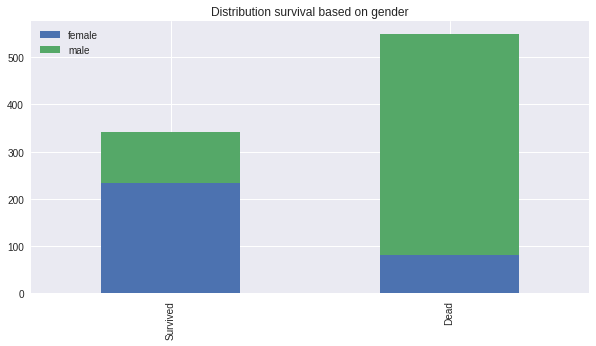

In [6]:
survived_sex = dataset[dataset['Survived'] == 1]['Sex'].value_counts()
dead_sex = dataset[dataset['Survived'] == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex, dead_sex], index=['Survived', 'Dead'])

# using pandas.dataframe.plot
df_sex.plot(kind='bar', stacked=True, figsize=(10,5), title='Distribution survival based on gender')

The `Sex` feature seems to be decisive feature. Women are more likely to survive

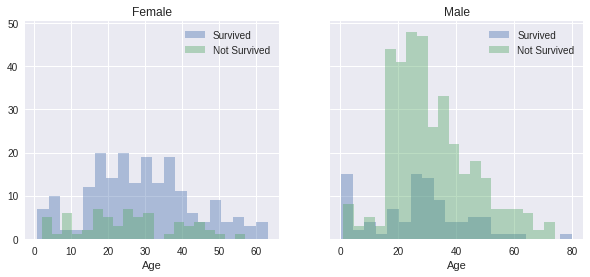

In [7]:
# create label
survived = 'Survived'
not_survived = 'Not Survived'

# initalize figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

female = dataset[dataset['Sex'] == 'female']
male = dataset[dataset['Sex'] == 'male']

# plot female passenger
ax = sns.distplot(female[female['Survived'] == 1].Age.dropna(), 
                  bins=20, label=survived, ax=axes[0], kde=False )
ax = sns.distplot(female[female['Survived'] == 0].Age.dropna(), 
                  bins=20, label=not_survived, ax=axes[0], kde=False )

ax.legend()
ax.set_title('Female')

# plot male passenger
ax = sns.distplot(male[male['Survived'] == 1].Age.dropna(),
                 bins=20, label=survived, ax=axes[1], kde=False)
ax = sns.distplot(male[male['Survived'] == 0].Age.dropna(),
                 bins=20, label=not_survived, ax=axes[1], kde=False)

ax.legend()
ax.set_title('Male')

You will notice that male passengers have higher probability of survival when they are nearly 22 to 30 years old although passenger who not survived is still higher. For women, the survival chance are higher between 14 and 40. You also notice that passenger who less 5 years had higher survival rate in both `Sex` feature.
<br>
These two first charts confirm that one old code of conduct that sailors and captains follow in case of threatening situations: <b>"Women and children first !".</b>

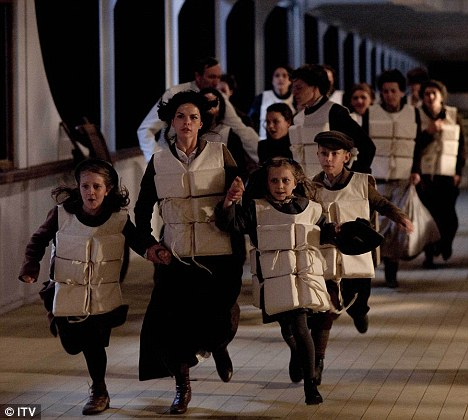

In [8]:
from IPython.display import Image
Image("img/women_childrent_first.jpg",height=700,width=700)

### `Pclass`, `Embarked` and `Sex`

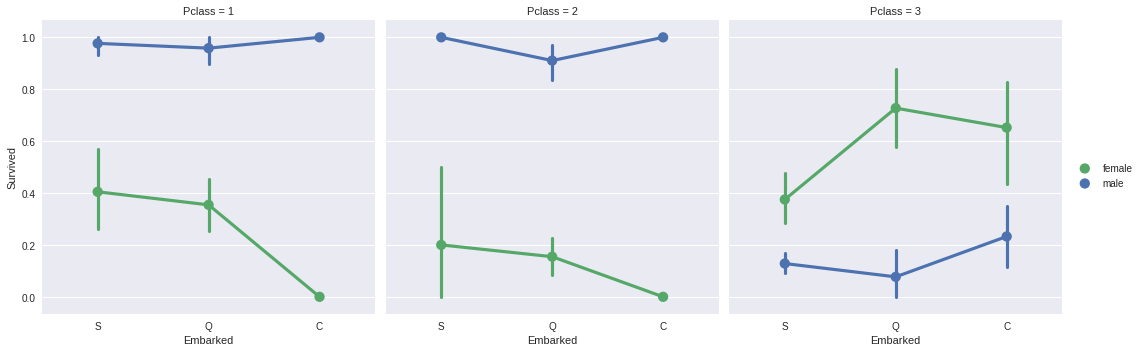

In [9]:
g = sns.FacetGrid(dataset, col='Pclass', size=5, aspect=1)
g.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', palette='deep', orde=None, hue_order=None).add_legend()

`Pclass` seems have influence to survival rate. Based on plot above, we know that male passengers in `Pclass`=1 and `Pclass`=2 have higher survival rate than male passengers in `Pclass`=3. Although female passenger have higher chance to survive, only female passenger in `Pclass`=3 who have higher survival rate.
<br>
Men have a high survival probability of they are on port C, but a low probability if they are on port Q or S.

## Handling null values

### Completing a numerical continous feature (`Age`)
We will first do this for the `Age` feature. One solution is to replace the null values with the median age which is more robust to outliers than the mean.

In [10]:
# dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

## Visualizing data

In [11]:
# g = sns.FacetGrid(dataset, col='Survived',row='Pclass', size=3, aspect=2)
# g.map(plt.hist, 'Age')

In [12]:
# #g = sns.FacetGrid(dataset, col='Survived', hue='Pclass', size=8, aspect=1)
# g.map(plt.scatter, 'Age', 'Fare').add_legend()

## Wrangle data


### Dropping features
By dropping features, we are dealing with fewer data. Speeds up our notebook and eases the analysis. Ticket and Passengerid will be dropped since there do not contribute to survival.

In [13]:
dataset = dataset.drop(['Ticket', 'PassengerId'], axis=1)
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S




### Creating new feature extracting from existing


#### Title features

In [14]:
# Create title feature
dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(dataset['Title'], dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We replace many titles with a more common name or classify them as Rare

In [15]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [16]:
dataset['Title'] = dataset.apply(replace_titles, axis=1)
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.158192
3,Mrs,0.777778


Now we can safely drop the `Name` feature from dataset

In [17]:
dataset = dataset.drop(['Name'], axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


#### Family size

In [18]:
dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp']
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,0


#### Cabin
A cabin number looks like ‘C123’. The letter refers to the deck, and so we’re going to extract these just like the titles.